In [142]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
import numpy as np
from math import sqrt

Load Data

In [143]:
tv = TvDatafeed()

df = tv.get_hist(symbol='SET:SET50', exchange='SET', interval=Interval.in_daily, n_bars=4500)

Unit Root Test

In [144]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['close'], autolag='BIC')
print(result[1])

0.41326875605329966


In [145]:
returns = np.log(df['close']).diff().dropna() #1st difference

result = adfuller(returns, autolag='BIC')
print(result[4])
print(result[0])
print(result[1])

{'1%': -3.431804978127318, '5%': -2.862182927172891, '10%': -2.567112233631009}
-45.81071831655749
0.0


Train-Test Split

In [146]:
train = int(len(returns)*0.8)
returns_train, returns_test= returns[:train], returns[train:]

Methods tried

In [167]:
from arch import arch_model
garch_model_fit = arch_model(returns_train,vol="Garch",p=1,q=1).fit(disp='off')
garch_forecast = garch_model_fit.forecast(horizon=len(returns_test))
print(garch_model_fit.summary)

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                10884.7
Distribution:                  Normal   AIC:                          -21761.4
Method:            Maximum Likelihood   BIC:                          -21736.7
                                        No. Observations:                 3599
Date:                Tue, Apr 23 2024   Df Residuals:                     3598
Time:                        15:46:56   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         6.3743

c:\Users\Inv_edg\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002006. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [168]:
arch_model_fit = arch_model(returns_train,vol="ARCH").fit(disp='off')
arch_forecast = arch_model_fit.forecast(horizon=len(returns_test))
print(arch_model_fit.summary)

<bound method ARCHModelResult.summary of                       Constant Mean - ARCH Model Results                      
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                10506.7
Distribution:                  Normal   AIC:                          -21007.5
Method:            Maximum Likelihood   BIC:                          -20988.9
                                        No. Observations:                 3599
Date:                Tue, Apr 23 2024   Df Residuals:                     3598
Time:                        15:46:59   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.5049

c:\Users\Inv_edg\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002006. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [190]:
from sklearn.metrics import mean_squared_error

garch_rmse = np.sqrt(mean_squared_error(returns_test,np.sqrt(garch_forecast.variance.values[-1,:])))
arch_rmse = np.sqrt(mean_squared_error(returns_test,np.sqrt(arch_forecast.variance.values[-1,:])))
print(garch_rmse,arch_rmse)

#v_garch = garch_model_fit.conditional_volatility[-len(returns_test):]
#print(returns_test - garch_forecast.variance.values[-1,:])
#print(garch_forecast.variance.values[-1,:])
#v_garch

0.016704474237664295 0.016765611370885912


0.01328414376938483

In [185]:
from arch import arch_model

model = arch_model(returns_train,vol="Garch",p=1,q=1)
results = model.fit()

forecast = 252

volatility = results.conditional_volatility

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5885975926867.78
Iteration:      2,   Func. Count:     19,   Neg. LLF: 26963298663.559288
Iteration:      3,   Func. Count:     33,   Neg. LLF: 47407147682.045296
Optimization terminated successfully    (Exit mode 0)
            Current function value: -10884.71995463948
            Iterations: 3
            Function evaluations: 43
            Gradient evaluations: 3


c:\Users\Inv_edg\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002006. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


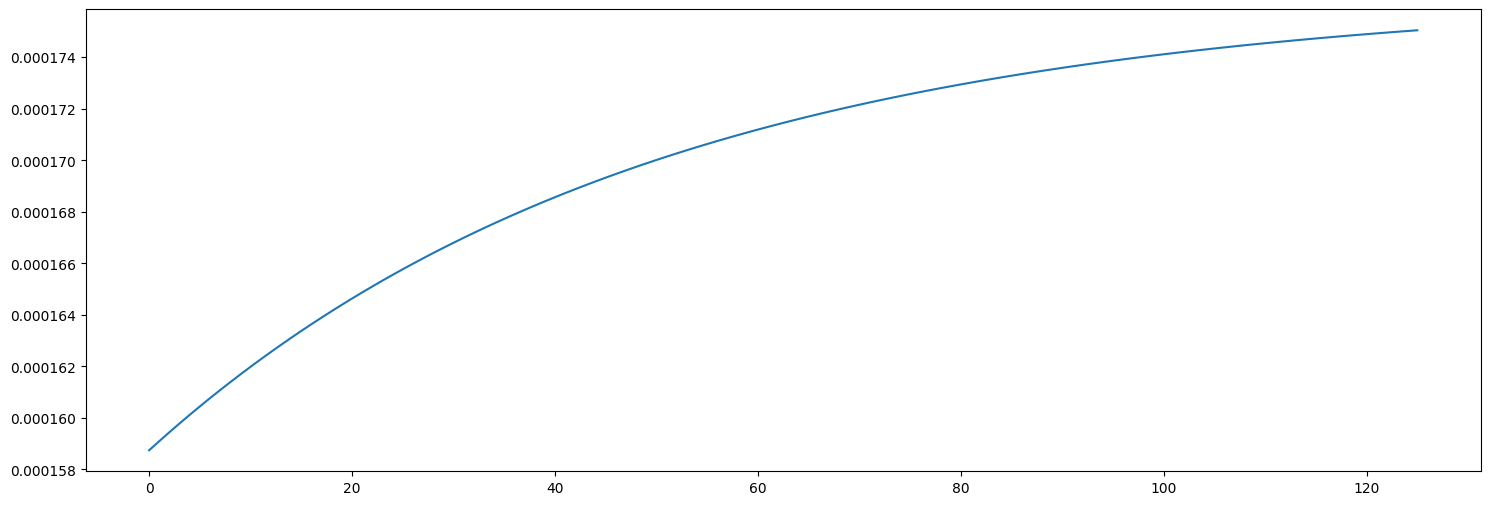

In [ ]:
forecast = results.forecast(horizon=126)
forecast_vol = forecast.variance.dropna().values.flatten()

plt.figure(figsize = (18,6))
plt.plot(forecast_vol, label="Forecasted")
plt.show()

In [ ]:
rmse = np.sqrt(np.mean((volatility - returns)**2))
print(rmse)

0.018652465045168116


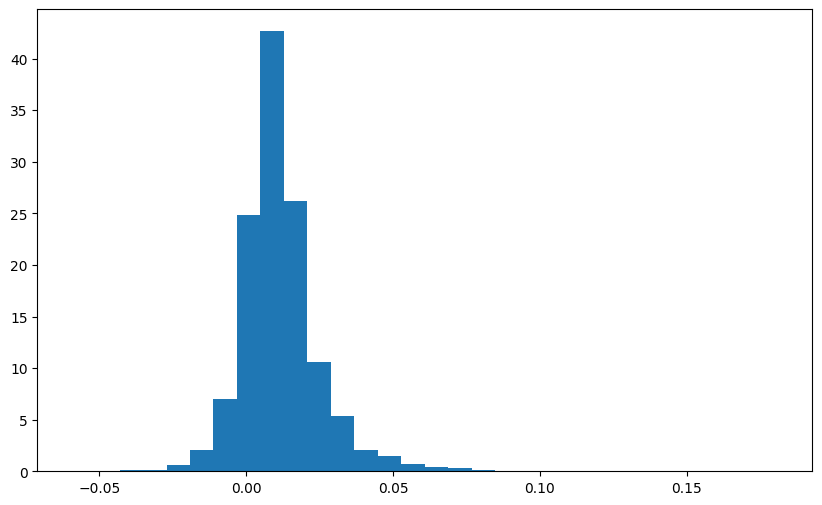

In [ ]:
error = volatility - returns
plt.figure(figsize=(10, 6))
plt.hist(error,bins=30,density=True)
plt.show()